# TP 1 Utilisation d'environnements de développement pour Python

# Pré-requis

Une connaissance de base de VIM et de VScode normalement acquise dans la SAE12 est requise. Donc avant le TP remettez en jeu vos compétences!

### Livrables attendus et compétences:

#### Livrables

- Ce Notebook avec les configurations de votre environnement de développement pour VScode et Vim.
- Une validation par l'enseignant au cours ou en fin du TP.
- Le travail est individuel sauf contre indication.
- Le travail est rendu sur github education. L'URL sera communiquée par l'enseignant.

#### Compétences qui vont être alimentées:

- Installer un poste de travail.
- Utiliser un système informatiques et ses outils.
- Lire, exécuter, corriger et modifier un programme.
- S'intégrer dans un environnement propice au développement et au travail collaboratif.
- Lier entre eux deux apprentissages critiques.
  
#### Composantes essentielles

- Respecter les règles métiers.
- Utiliser une approche rigoureuse pour les dysfonctionnements. 
- Assurer une veille technologique.

# Introduction
L'éditeur de codes appelé souvent **"Integrated Development Environment"**  est un atout pour la **productivité** du développeur. Il existe de nombreux éditeurs spécialisés sur le développement en langage Python ou des IDE généralistes. On exclura les I.D.E payants ici: ils sont souvent bons, peut être meilleur que les IDE "gratuits" mais nos besoins restent modestes. 

Quel IDE pour quels usages ?

* Tout développeur versionne son code et le sauvegarde (même le développeur occasionnel). Git est l'outil indispensable pour le faire et **vous l'utiliserez obligatoirement**.

* Vim est mon choix d'I.D.E/éditeur quand il faut écrire un morceau de code rapidement. Avec son plugin "You Complete me" qui apporte la complétion il se transforme en IDE. L'intégration de VIM avec GitHub ou GitLab est aussi possible. Vim ne nécessite pas une interface graphique et peut travailler via ssh sur un fichier distant. C'est la **jeep des IDE**.

* Je ne suis pas un pro-Microsoft (ni un anti-Microsoft)  mais cette société a toujours édité des outils pour les développeurs avec sa suite "Visual Studio". La mise en OpenSource de VScode a amené beaucoup de développeur à utiliser VScode. 
  
* VScode a des qualités:
  - Il est Multi-langages. Un investissement dans VScode est donc rapidement amorti. Je m'en sers pour éditer du code Python, des Notebooks Jupyter, du Markdown, du code Ansible, des Dockerfiles et des manifestes K8S ), du Latex , des dessins avec DrawIO ... Le choix est très large.
  - Ubiquitaire, Vscode se connecte facilement à une machine virtuelle distante ou mieux à un container. Si vous voulez uniformiser votre environnement de développement pour l'ensemble de vos développeurs il est facile de construire une image Docker et de l'instancier pour trouver la version de Python et les packages nécessaires dans votre domaine d'activité.

Nous allons maintenant passer à l'action au travers de notre TP.

### Aparté:

Indiquez ici en quelques phrases et en 5mn  en quoi le fonctionnement de Vscode est en phase avec la philosophie objet. Confrontez vos idées avec votre voisin.  

...

# L'installation de Python 

la plupart des systèmes Linux sont livrés avec Python 3. Mais utiliser le binaire Python fourni par le système n'est en général pas une bonne idée:
- Vous pouvez avoir besoin d'une version plus récente.
- Vous dégradez votre OS par l'installation de packages.
- L'enfer des dépendances vous tend les bras...
  
Pyenv dont je suis fan vous permet en tant qu'utilisateur d'installer plusieurs versions de Python et de passer facilement de l'une à l'autre. La gestion des packages peut se faire par projet à l'aide virtualenv ou sur chaque version de Python (non recommandé mais bien pratique).



## Exercice 1 Installation de PyEnv et de la dernière version de Python:

Durée estimée: 30 mn
Vous travaillez avec un user lambda (student, test...) pas sous root.
Pyenv dispose d'un auto installeur qui fonctionne bien.

Un bon article: https://blog.stephane-robert.info/post/python-pyenv-pipenv/




On installe d'abord les dépendances sur notre distribution, en l'occurence, sur Fedora 40 Rawhide.

```sh
yum install zlib-devel bzip2 bzip2-devel readline-devel sqlite sqlite-devel openssl-devel xz xz-devel libffi-devel gcc make
```

Ensuite, nous installons le paquet PyEnv via le script Bash donné et que l'on récupère via un cURL:

```sh
curl https://pyenv.run | bash
```

Dans mon cas, j'ai déjà PyEnv d'installé, ainsi donc je n'ai pas à le configurer dans mon environnement mais s'il n'est pas déjà installé, après avoir lancé le script il faut ajouter la configuration suivante dans un fichier de configuration bash (e.g. `.bashrc`, `.bash_profile`):

```sh
export PYENV_ROOT="$HOME/.pyenv"
command -v pyenv >/dev/null || export PATH="$PYENV_ROOT/bin:$PATH"
eval "$(pyenv init -)"
```

Il faudra ensuite reload le shell (i.e. `source ~/.bashrc`).

Pour finir, on devra installer `pipenv` afin de pouvoir installer facilement les bibliothèques dans notre `Venv`:

```sh
pip install venv
```

On pourra ensuite installer une version de Python puis créer notre Venv.

```sh
pyenv install -v 3.11
```

puis

```sh
pyenv virtualenv 3.11 r308-tp1
```

On pourra vérifier que le Venv a bien été initialisé en faisant:

```sh
pyenv virtualenvs
```

## Environnements virtuels dans pyenv

Pyenv permet d'installer des packages relatifs à une version de Python. Tant que vous n'avez qu'un seul projet associer les packages à la version de Python ne pose pas de problèmes. Les dépendances entre les packages peuvent être différentes dans chaque projet. Il est donc préférable de gérer les packages par projet.

Il existe des outils pour vous aider à gérer les projets et les packages qui y sont rattachés.
VirtualEnv est un outil mature dans l'écosystème Python et il gère les dépendances des packages.


Poetry est récent et offre une interface unifiée pour gérer des projets. A ce titre il inclue virtualenv et il permet de gérer jusqu'à la publication du package.

On peut aussi citer comme outils  pipeenv qui inclue pyenv et le gestionnaire pip de packages Python.



## Exercice 3 

Durée estimé 10 mn



poetry fonctionne aussi avec pyenv et inclue venv.
La documentation de Poetry est accessible ici: https://python-poetry.org/docs

On vous demande:
 

- D'installer Poetry.

    En ce qui concerne l'installation de Poetry, je préfère l'installer de manière manuelle.

    On installe Poetry:

    ```sh
    python3 -m venv $VENV_PATH
    $VENV_PATH/bin/pip install -U pip setuptools
    $VENV_PATH/bin/pip install poetry
    ```

    On installera ensuite l'auto-completion en mode `lazy-loaded` dans notre Bash:

    ```sh
    poetry completions bash > ${XDG_DATA_HOME:-~/.local/share}/bash-completion/completions/poetry
    ```

- De créer un package p1 dans une directory projetp1 (voir option new de poetry).
    Après avoir créé un répertoire `projetp1`, de manière à s'assurer de ne pas avoir de problèmes, on crée donc un nouveau package.
    ```sh
    poetry new --name=p1 ./projetp1/
    ```

- D'obtenir des infos sur le package p1.

    On se déplace dans le répertoire `projetp1`:

    ```sh
    cd ./projetp1/
    ```

    On fait ensuite `show`:

    ```sh
    poetry show
    ```

- De décrire le contenu du fichier toml. Ne le modifiez pas c'est poetry qui le fait en fonction des commandes passées.  

    Le fichier TOML suivant a été créé pour mon paquet p1:

    ```toml
    [tool.poetry]
    name = "p1"
    version = "0.1.0"
    description = ""
    authors = ["alexis-opolka <53085471+alexis-opolka@users.noreply.github.com>"]
    readme = "README.md"

    [tool.poetry.dependencies]
    python = "^3.12"


    [build-system]
    requires = ["poetry-core"]
    build-backend = "poetry.core.masonry.api"
    ```

- Après avoir lancé un shell avec poetry , d'ajoutez (toujours avec poetry) le package ipython.

    On ajoute ipython avec poetry:

    ```sh
    poetry add ipython
    ```

- De simulez (dry-run) l'ajout du package arrow dans le projet dans sa dernière version (latest). Ce package ne devra pas être une dépendance obligatoire du projet. 

    On doit donc faire:

    ```sh
    poetry add arrow --optional --dry-run
    ```

    Nous avons comme sortie:

    ```sh
    Using version ^1.2.3 for arrow

    Updating dependencies
    Resolving dependencies... (0.3s)

    Package operations: 0 installs, 0 updates, 0 removals, 20 skipped

      • Installing python-dateutil (2.8.2): Skipped for the following reason: Not required
      • Installing arrow (1.2.3): Skipped for the following reason: Not required
      • Installing asttokens (2.4.0): Skipped for the following reason: Already installed
      • Installing backcall (0.2.0): Skipped for the following reason: Already installed
      • Installing decorator (5.1.1): Skipped for the following reason: Already installed
      • Installing executing (2.0.0): Skipped for the following reason: Already installed
      • Installing ipython (8.16.0): Skipped for the following reason: Already installed
      • Installing jedi (0.19.0): Skipped for the following reason: Already installed
      • Installing matplotlib-inline (0.1.6): Skipped for the following reason: Already installed
      • Installing parso (0.8.3): Skipped for the following reason: Already installed
      • Installing pexpect (4.8.0): Skipped for the following reason: Already installed
      • Installing pickleshare (0.7.5): Skipped for the following reason: Already installed
      • Installing prompt-toolkit (3.0.39): Skipped for the following reason: Already installed
      • Installing ptyprocess (0.7.0): Skipped for the following reason: Already installed
      • Installing six (1.16.0): Skipped for the following reason: Already installed
      • Installing pure-eval (0.2.2): Skipped for the following reason: Already installed
      • Installing pygments (2.16.1): Skipped for the following reason: Already installed
      • Installing stack-data (0.6.3): Skipped for the following reason: Already installed
      • Installing traitlets (5.10.1): Skipped for the following reason: Already installed
      • Installing wcwidth (0.2.8): Skipped for the following reason: Already installed
    ```

- Ajoutez maintenant arrow  dans votre projet puis enlevez-le.

    On fait alors:

    ```sh
    poetry add arrow --optional 
    ```

    puis

    ```sh
    poetry remove arrow
    ```

- Builder package avec poetry ( on pourrait aussi le pousser sur pypi mais on ne le fera pas pour ne pas encombrer)

    On build maintenant le paquet:

    ```sh
    poetry build
    ```

> **Note:**  
> On fera un check avec le prof.

## Exercice 3 Configurez Vim en IDE pour Python

Durée estimée 1 heure 


Vim de base est un éditeur intéressant. Il lui manque néanmoins certaines capacités pour le transformer en IDE.
Ces capacités sont accessibles au travers des plugins de vim.
Il existe plusieurs installeurs de plugins. On travaillera ici avec vundle (https://github.com/VundleVim/Vundle.vim)

Il vous est demandé de transformer votre vim en IDE avec la complétion pour le langage Python sur un VM Ubuntu 22.
Vous utiliserez la version de Python installée avec Pyenv précédemment pour les plugins de VIM qui travaille avec Python.


Vous pouvez vous aider des articles suivants:

- https://realpython.com/vim-and-python-a-match-made-in-heaven/ (c'est de 2015 tout ne fonctionnera pas il faut l'adapter) 
- https://static.realpython.com/guides/vim-setup-guide.pdf (idem en PDF)
- https://vimawesome.com/ pour les plugins ()

L'auto-complétion est une composante essentielle d'un IDE. Le plugin central de votre IDE: "YouCompleteMe" est disponible pour l'auto installeur Vundle 


Un peu d'aide pour l'installation de youcompleteme avec pyenv 
```bash

~/.vim/bundle/YouCompleteMe/install.py --clang-completer
```






On installe donc Vundle:

```sh
git clone https://github.com/VundleVim/Vundle.vim.git ~/.vim/bundle/Vundle.vim
```

puis on crée le fichier `~/.vimrc`:

```sh
set nocompatible
filetype off

set rtp+=~/.vim/bundle/Vundle.vim
call vundle#begin('~/.vim/plugins/')

Plugin 'VundleVim/Vundle.vim'
Plugin 'tpope/vim-fugitive'
Plugin 'git://git.wincent.com/command-t.git'
Plugin 'tpope/vim-commentary'
Plugin 'ycm-core/YouCompleteMe'
Plugin 'gosukiwi/vim-atom-dark'


call vundle#end()
filetype plugin indent on
```

Après, on installe les Plugins en faisant:

```sh
vim +PluginInstall
```

Dans le cas de `YouCompleteMe`, après l'installation des plugins par Vundle, on fait:

```sh
cd ~/.vim/plugins/YouCompleteMe/ \
&& sudo dnf install python3.12-devel -y \
&& python3 install.py --all
```

puis on le configure:

- Dans notre `~/.vimrc`:

    ```txt
    " Here is our current configuration for YCM
    let g:ycm_python_interpreter_path = ''
    let g:ycm_python_sys_path = []
    let g:ycm_extra_conf_vim_data = [
      \  'g:ycm_python_interpreter_path',
      \  'g:ycm_python_sys_path'
      \]
    let g:ycm_global_ycm_extra_conf = '~/.vim/ycm-configs/global_extra_conf.py'

    " End of its configuration
    ```

- Dans notre `~/.vim/ycm-configs/global_extra_conf.py`

    ```py
    def Settings( **kwargs ):
      client_data = kwargs[ 'client_data' ]
      return {
        'interpreter_path': client_data[ 'g:ycm_python_interpreter_path' ],
        'sys_path': client_data[ 'g:ycm_python_sys_path' ]
      }
    ```


> **Note:**  
> On fera un check avec le prof.

## Exercice 4 - Vscode, SSH et les containers

Durée estimée: 30 mn

Vous allez travailler sur un container Python pré-installé avec de la complétion. Passez les commandes suivantes:

```bash
alias snake="docker run --rm -it -v "$(pwd):$(pwd)" -w $(pwd) registry.iutbeziers.fr/pythoniut:light"
snake 
vim test.py
```

1. Vous connecterez votre VSCODE à un container Python qui founira l'interpréteur Python pour vos projets.
2. Vous installerez le module Vim pour vscode et vous utiliserez "vim easy motion" , "vim surround" et "vim indent object"

    On installera l'extension suivante: [VS Code Vim](https://marketplace.visualstudio.com/items?itemName=vscodevim.vim)

    On ajoutera ensuite dans notre `settings.json` la configuration suivante:

    ```json
    {
        "vim.easymotion": true,
        "vim.surround": true,
        "vim.autoindent": true
    }
    ```

    D'après YCM, il fonctionne:

   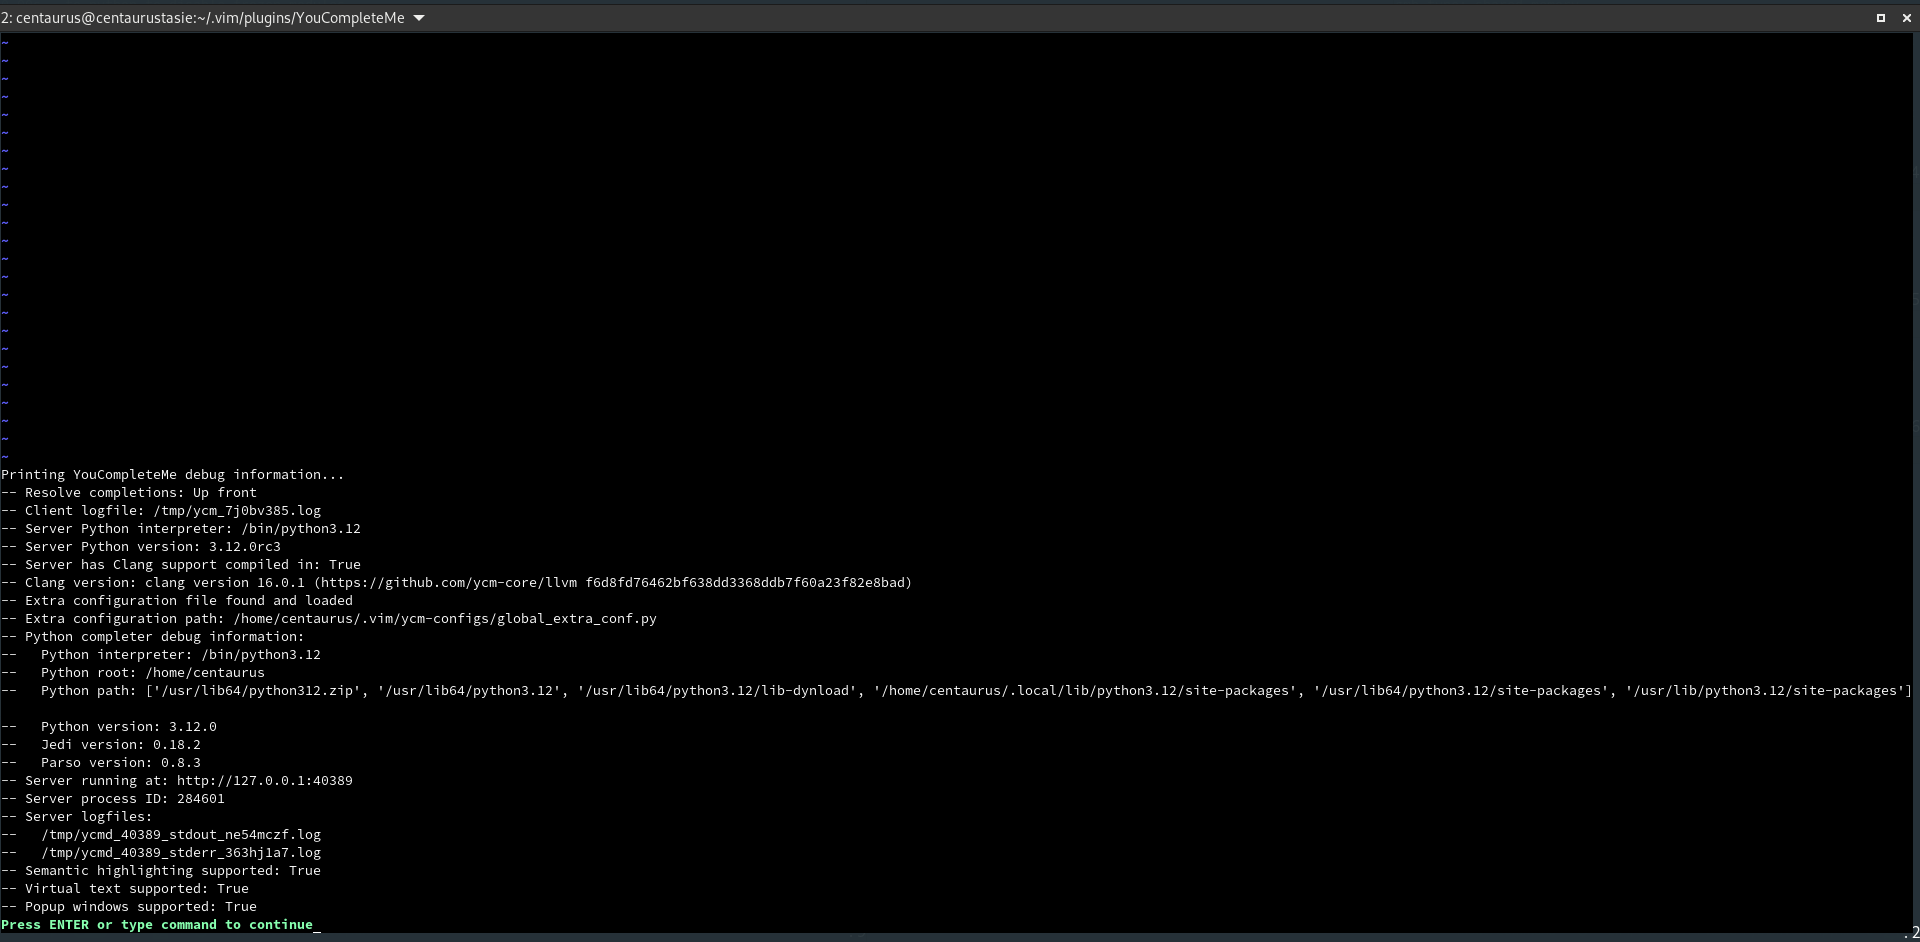
   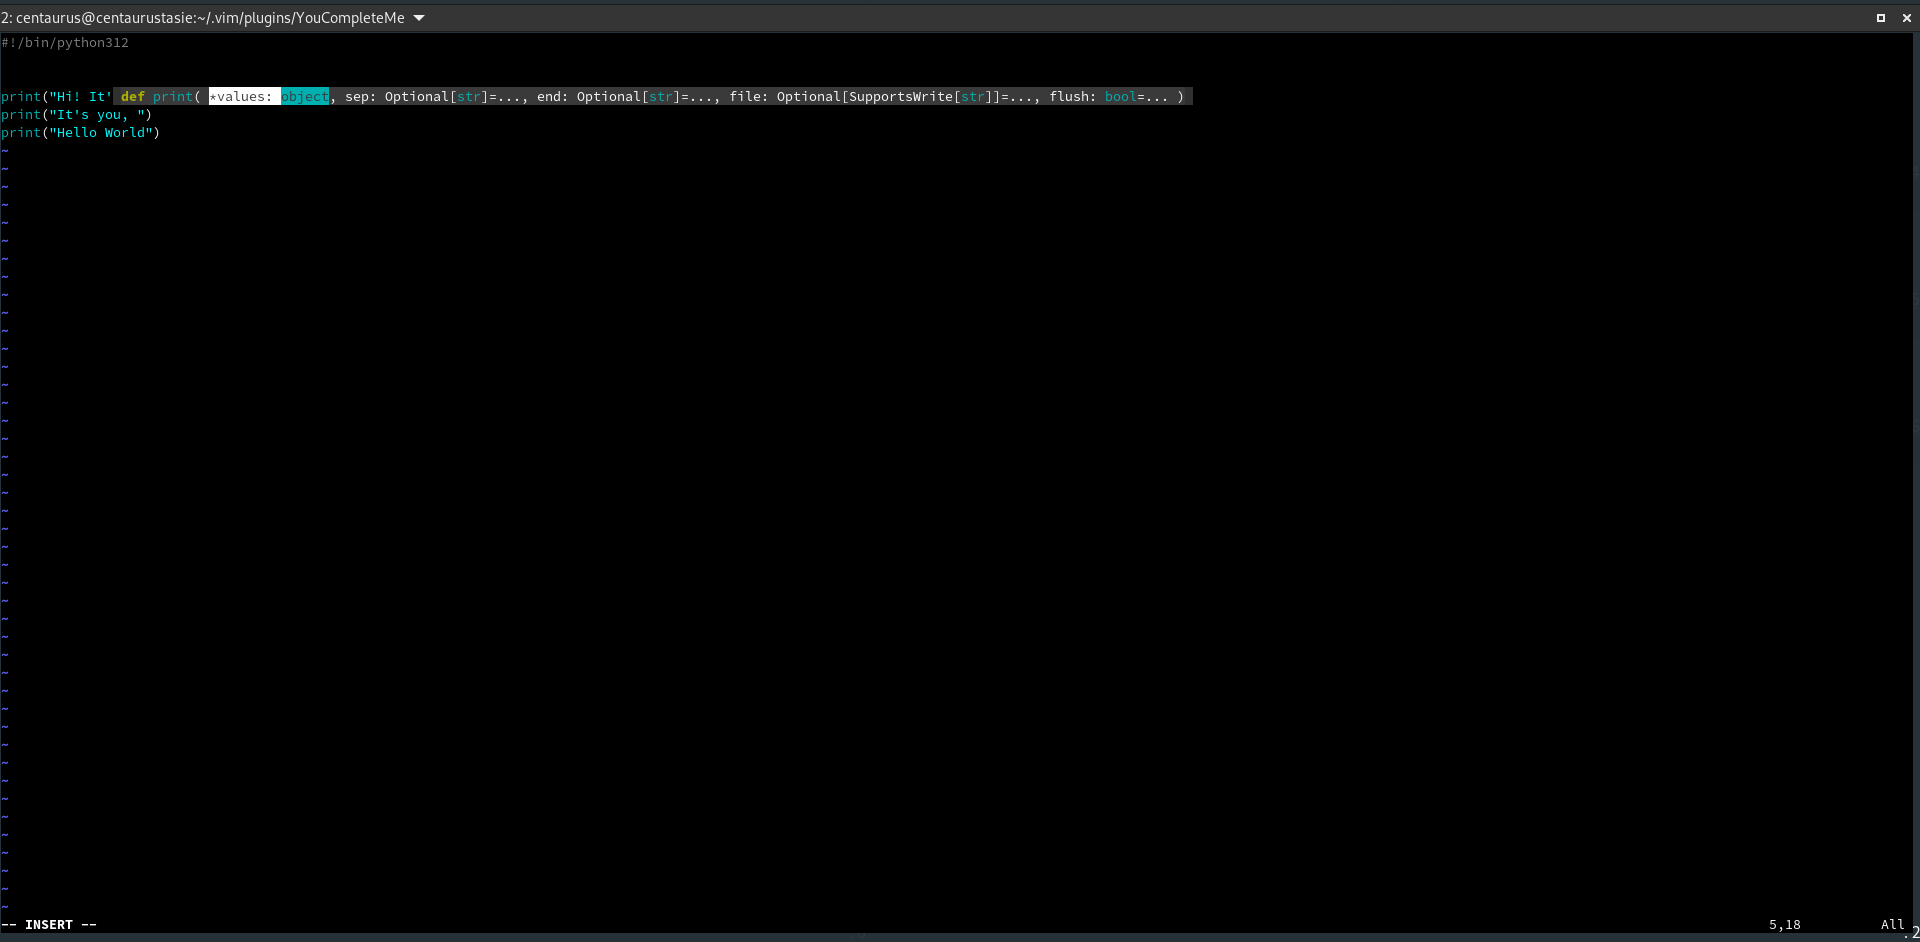
   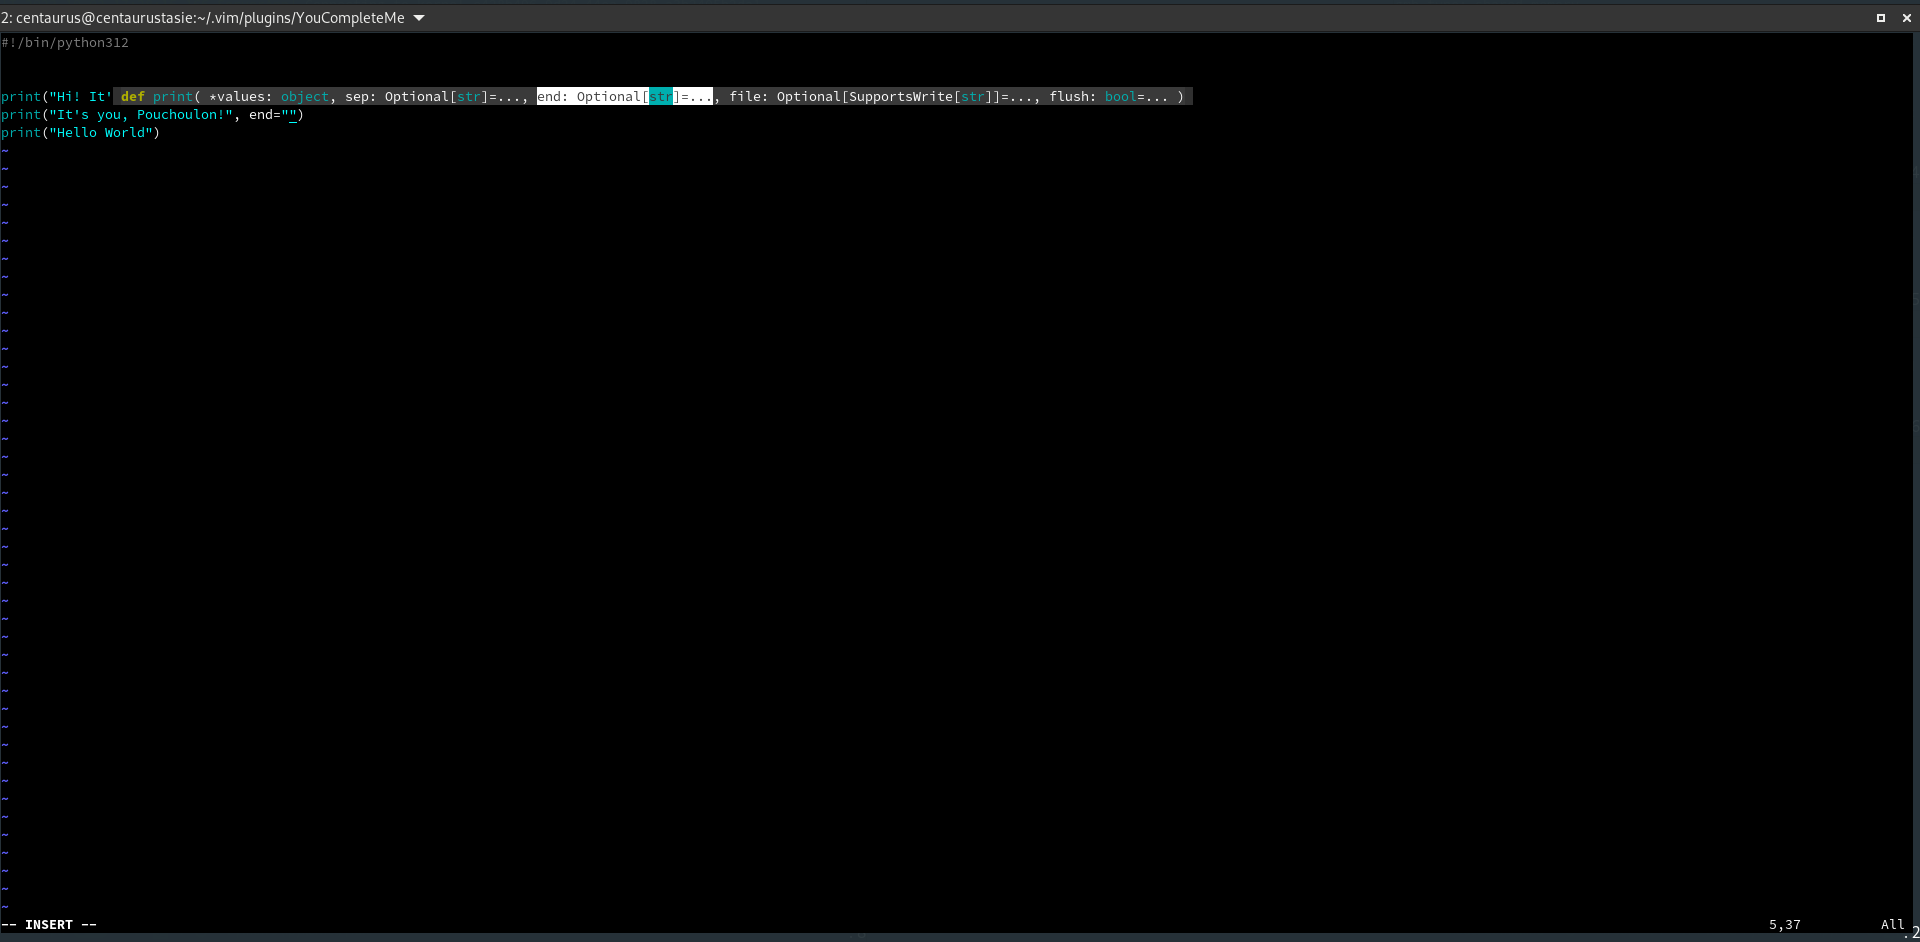


> **Note:**  
> On fera un check avec le prof.

## Exercice 5 Jupyter notebook et Ipython 

Durée estimée : 30 minutes Travail par groupe de 2.

Ipython est un shell survitaminé pour Python et s'apparente à un IDE avec la completion, le debug et les rappels des commandes. Il est capable aussi d'appeler le bash de votre machine. C'est un complément efficace à des développements rapides.
Il est aussi inclu dans jupyter.

Vous installerez ipython sur votre machine via
```bash
pip install jupyter ipython
jupyter lab
```

Complétez les cellules suivantes par des explications, des titres ou des démos. Certaines fonctions "magiques" ne seront accessibles depuis un navigateur: lancez la commande "jupyter lab" depuis la console pour retrouver ce notebook.


On crée un Venv pour Jupyter:

```sh
pyenv venv 3.11 jupyter
pyenv activate jupyter
pip install jupyter ipython
```


# ![title](images/jupyterlab.png)


In [4]:
data = ['Number of users', 123456]
data[0]
%timeit range(10)
data?


89.4 ns ± 0.854 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


Type:        list
String form: ['Number of users', 123456]
Length:      2
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

In [5]:
%connect_info

{
  "shell_port": 40027,
  "iopub_port": 49221,
  "stdin_port": 59417,
  "control_port": 36853,
  "hb_port": 44243,
  "ip": "127.0.0.1",
  "key": "ba851afa-46a1006158e05b83b1b8fd38",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/home/centaurus/Documents/depots/iut-related/import-cours-but-rt/cours/modules/R308/R308-TP/R308-TP1/TP1-R308-PythonTools.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-e428b496-9d24-44ea-9828-a3b2405b2da1.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [7]:
%qtconsole

In [8]:
%run test.py

test
Hello world


In [9]:
!ping -c4 www.cru.fr

PING ix1-pv-lbl-vip-194-57-3-16.renater.fr (194.57.3.16) 56(84) bytes of data.

--- ix1-pv-lbl-vip-194-57-3-16.renater.fr ping statistics ---
4 packets transmitted, 0 received, 100% packet loss, time 3081ms



In [10]:
%history 

data = ['Number of users', 123456]
data[0]
%timeit range(10)
data?
data = ['Number of users', 123456]
data[0]
%timeit range(10)
data?
data = ['Number of users', 123456]
print(data[0])
%timeit range(10)
data?
data = ['Number of users', 123456]
data[0]
%timeit range(10)
data?
%connect_info
%qtconsole
%qtconsole
%run test.py
!ping -c4 www.cru.fr
%history


In [10]:
%pastebin 3

'https://dpaste.com/A47L8RQ97'

In [11]:
%run test.py

test
Hello world


In [12]:
%run -d test.py

*** Blank or comment
*** Blank or comment
*** Blank or comment
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> /home/centaurus/Documents/depots/iut-related/import-cours-but-rt/cours/modules/R308/R308-TP/R308-TP1/test.py(3)<module>()
      1 
      2 
----> 3 print("test")
      4 
      5 



ipdb>  
ipdb>  
ipdb>  print("test")


test
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user
test
Hello world


In [14]:
import sys
1/0


ZeroDivisionError: division by zero

In [15]:
image.png

NameError: name 'image' is not defined

In [ ]:
#%% 
%%time
print('bar')

In [ ]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
a = np.linspace(0,1,5)
b = np.linspace(1,2,5)
plt.scatter(a,b)

```bash
pip install ipympl
```

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib widget

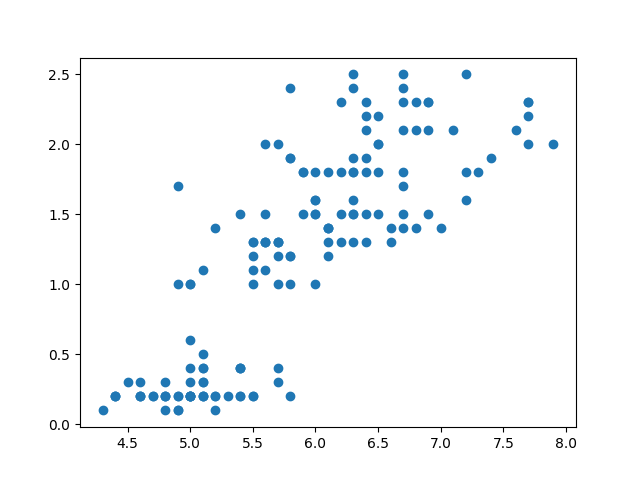

In [4]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
plt.scatter('sepal_length', 'petal_width', data=iris)

### Débugger avec ipython

In [ ]:
Utilisez breakpoint() pour mettre un point d'arrêt dans votre code